## Insights From Failed Orders

### Reference: 
    
https://platform.stratascratch.com/data-projects/insights-failed-orders

Gett, previously known as GetTaxi, is an Israeli-developed technology platform solely focused on corporate Ground Transportation Management (GTM). They have an application where clients can order taxis, and drivers can accept their rides (offers). At the moment, when the client clicks the Order button in the application, the matching system searches for the most relevant drivers and offers them the order. In this task, we would like to investigate some matching metrics for orders that did not completed successfully, i.e., the customer didn't end up getting a car.

### Assignment

1. Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

2. Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

3. Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

4. Plot the distribution of average ETA by hours. How can this plot be explained?

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# applying the same styling for all the plots in this notebook
sns.set_style("darkgrid")

orders = pd.read_csv('data/data_orders.csv')
orders

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


In [29]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


## Question 1. Distribution of Orders According to Reasons for Failure

### Assignment:

Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

### Supporting info:

For this assignment we are to look closely at two folowing columns: `order_status_key` and `is_driver_assigned_key`.

Mapping for column `order_status_key`:

- 4 - cancelled by client,
- 9 - cancelled by system, i.e., a reject

Mapping for column `is_driver_assigned_key` 

- 1 - yes
- 0 - no

In [30]:
orders

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


In [31]:
orders['order_status_key'].value_counts()

order_status_key
4    7307
9    3409
Name: count, dtype: int64

In [32]:
orders['is_driver_assigned_key'].value_counts()

is_driver_assigned_key
0    7902
1    2814
Name: count, dtype: int64

In [33]:
# re-mapping column 'order_status_key' with def-function

def cancelled_by(x):
    if x == 4:
        return 'client'
    elif x == 9:
        return 'system'
    else:
        return ""

In [34]:
orders["cancelled_by"] = orders['order_status_key'].apply(cancelled_by)
orders[["order_status_key", "cancelled_by"]]

,order_status_key,cancelled_by
0,4,client
1,4,client
2,4,client
3,4,client
4,9,system
...,...,...
10711,4,client
10712,4,client
10713,4,client
10714,4,client


In [35]:
# re-mapping column 'is_driver_assigned_key' into human-readable form

def is_driver_assigned(x):
    if x == 1:
        return 'yes'
    elif x == 0:
        return 'no'
    else:
        return ""

In [36]:
orders["is_driver_assigned"] = orders['is_driver_assigned_key'].apply(is_driver_assigned)
orders[['is_driver_assigned_key', "is_driver_assigned"]]

,is_driver_assigned_key,is_driver_assigned
0,1,yes
1,0,no
2,1,yes
3,1,yes
4,0,no
...,...,...
10711,0,no
10712,0,no
10713,1,yes
10714,0,no


In [37]:
orders.groupby(["cancelled_by"])['is_driver_assigned'].value_counts()

cancelled_by  is_driver_assigned
client        no                    4496
              yes                   2811
system        no                    3406
              yes                      3
Name: count, dtype: int64

In [38]:
orders.groupby(["cancelled_by"])['is_driver_assigned'].value_counts().unstack()

is_driver_assigned,no,yes
cancelled_by,,
client,4496,2811
system,3406,3


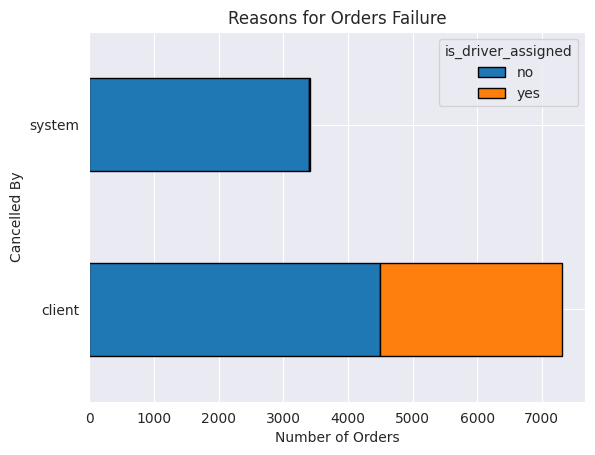

In [39]:
orders.groupby(["cancelled_by"])['is_driver_assigned'].value_counts().unstack().plot.barh(stacked = True,
                                                                                          edgecolor = 'black',
                                                                                          linewidth = 1)
                                                                                        
plt.title('Reasons for Orders Failure')
plt.ylabel('Cancelled By')
plt.xlabel('Number of Orders')

plt.show()

### Insights:

- Clients cancelled orders twice as much as the system
- For category `cancelled by system` driver was nearly never assigned
- Yet, there were a lot of cases (2811 out of 7307) when clients cancelled order after driver has been assigned for the ride

## Question 2. Distribution of Failed Orders by Hours

### Assignment:

Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

In [40]:
orders

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,cancelled_by,is_driver_assigned
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,client,yes
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,client,no
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,client,yes
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,client,yes
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,system,no
...,...,...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,client,no
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0,client,no
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,client,yes
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0,client,no


In [41]:
orders['cancellation_hour'] = pd.to_datetime(orders["order_datetime"]).dt.hour
orders[["order_datetime", "cancellation_hour"]]

/tmp/ipykernel_4858/3660011236.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders['cancellation_hour'] = pd.to_datetime(orders["order_datetime"]).dt.hour


,order_datetime,cancellation_hour
0,18:08:07,18
1,20:57:32,20
2,12:07:50,12
3,13:50:20,13
4,21:24:45,21
...,...,...
10711,13:11:35,13
10712,13:13:55,13
10713,13:17:21,13
10714,13:16:28,13


In [42]:
orders.groupby(["cancelled_by"])[["is_driver_assigned", "cancellation_hour"]].value_counts().head(15)

cancelled_by  is_driver_assigned  cancellation_hour
client        no                  21                   448
                                  8                    413
                                  23                   378
                                  22                   326
              yes                 8                    314
              no                  0                    298
                                  2                    237
                                  20                   230
                                  17                   227
                                  3                    224
                                  1                    219
                                  15                   172
              yes                 17                   167
              no                  7                    164
                                  18                   158
Name: count, dtype: int64

In [43]:
orders.groupby(["cancelled_by"])["cancellation_hour"].value_counts()

cancelled_by  cancellation_hour
client        8                    727
              21                   550
              23                   534
              22                   475
              0                    418
              17                   394
              20                   344
              7                    320
              2                    315
              15                   315
              1                    307
              9                    304
              18                   292
              3                    288
              16                   274
              13                   268
              19                   233
              12                   205
              14                   203
              11                   166
              10                   130
              6                    114
              4                     91
              5                     40
system        8                 

In [44]:
orders["cancellation_hour"].value_counts().head(15)

cancellation_hour
8     1082
21     846
23     836
22     716
0      683
2      555
17     541
3      513
1      471
20     469
7      447
15     439
18     414
9      412
13     366
Name: count, dtype: int64

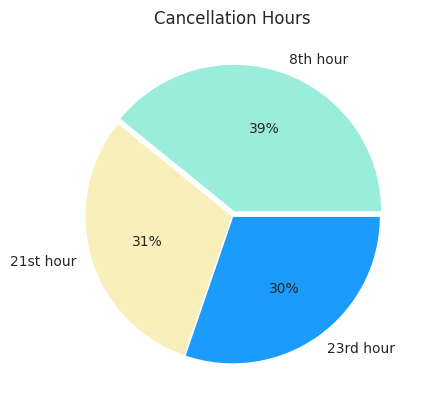

In [64]:
orders["cancellation_hour"].value_counts().head(3).plot(kind = 'pie', 
                                                        autopct = '%1.0f%%',
                                                       labels = ['8th hour', '21st hour', '23rd hour'],
                                                       ylabel = "",
                                                       explode = [0.03, 0, 0],
                                                       colors = ['#9AECDB', '#F8EFBA', '#1B9CFC'])

plt.title('Cancellation Hours')

plt.show()

### Insights:

- Most of cancellations usually occurr in the morning at 8AM, or in the late evening at 21-23PM
- Both system and clients contributed evenly in the hour-cancellation-breakdown. No specific group has more cancellations in the morning or evening hours
- High amount of cancellations in the morning hours may be explained by morning tense traffic around the cities. Clients tend to get to their workplaces ASAP, so they cannot wait for taxis too long
- In cases when taxi goes to the client through the jams too long, clients may prefer other types of public transportation (e.g. subway)
- In the late hours number of clients decreases and so does number of taxis. Clients tend to wait longer for the taxis that remain active. More clients waiting longer for taxis = more cancellations occurr

## Question 3. Average Time to Cancellation With and Without Driver

### Assignment:

Plot the average time to cancellation with and without driver, by hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

In [65]:
orders

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,cancelled_by,is_driver_assigned,cancellation_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,client,yes,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,client,no,20
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,client,yes,12
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,client,yes,13
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,system,no,21
...,...,...,...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,client,no,13
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0,client,no,13
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,client,yes,13
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0,client,no,13


In [73]:
avg_time = orders[['cancellations_time_in_seconds', 'is_driver_assigned', 'cancellation_hour']].dropna()
avg_time

,cancellations_time_in_seconds,is_driver_assigned,cancellation_hour
0,198.0,yes,18
1,128.0,no,20
2,46.0,yes,12
3,62.0,yes,13
9,78.0,no,6
...,...,...,...
10711,36.0,no,13
10712,4.0,no,13
10713,34.0,yes,13
10714,6.0,no,13


In [47]:
with_driver = avg_time[avg_time['is_driver_assigned'] == 'yes'].groupby(['cancellation_hour'])['cancellations_time_in_seconds'].mean()
with_driver.reset_index().set_index("cancellation_hour")

,cancellations_time_in_seconds
cancellation_hour,
0,293.616667
1,247.715909
2,303.307692
3,292.640625
4,243.219512
5,314.400000
6,272.553191
7,188.891026
8,189.025478


In [48]:
without_driver = avg_time[avg_time['is_driver_assigned'] == 'no'].groupby(['cancellation_hour'])['cancellations_time_in_seconds'].mean()
without_driver.reset_index().set_index("cancellation_hour")

,cancellations_time_in_seconds
cancellation_hour,
0,111.557047
1,98.132420
2,106.438819
3,104.361607
4,90.000000
5,121.800000
6,124.955224
7,112.628049
8,120.702179


In [49]:
result = pd.concat([with_driver, without_driver], axis = 1, keys = ["with_driver", "without_driver"])
result

,with_driver,without_driver
cancellation_hour,,
0,293.616667,111.557047
1,247.715909,98.132420
2,303.307692,106.438819
3,292.640625,104.361607
4,243.219512,90.000000
5,314.400000,121.800000
6,272.553191,124.955224
7,188.891026,112.628049
8,189.025478,120.702179


/tmp/ipykernel_4858/703476489.py:1: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data = result, markers = "o")


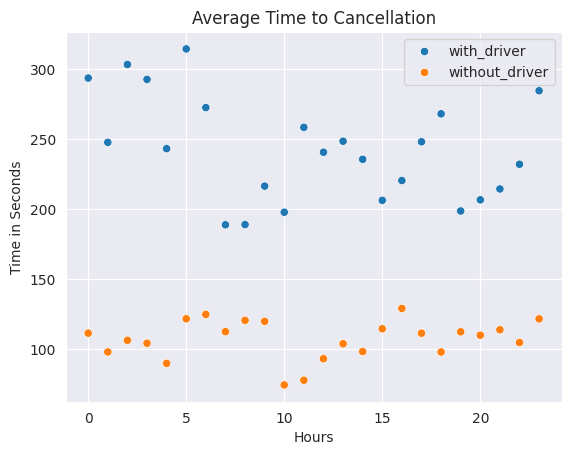

In [70]:
sns.scatterplot(data = result, markers = "o")

plt.title('Average Time to Cancellation')
plt.xlabel('Hours')
plt.ylabel('Time in Seconds')

plt.show()

### Insights:

- As we know from the first chart (Reasons for Orders Failure), `with_driver` group belongs solely to `cancelled by client` group. So it can be said that `with_driver` group = `cancelled by client` group
- In this regard, conclusion may be made that cancellation time range for clients (190s - 314s) varies more that cancellation time range (75s - 130s) for system (124s and 55s respectively)
- Based on previous conclusion, one more takeaway may be made: in the morning (8AM) and evening (20-22PM) hours clients (not system) tend to cancell order quickly (200s)
- For night hours (0 - 5AM) this value is much bigger - up to 300s

## Question 4. Average ETA by Hours

### Assignment:

Plot the distribution of average ETA (time before arrival) by hours. How can this plot be explained?

In [75]:
orders

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,cancelled_by,is_driver_assigned,cancellation_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,client,yes,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,client,no,20
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,client,yes,12
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,client,yes,13
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,system,no,21
...,...,...,...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,client,no,13
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0,client,no,13
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,client,yes,13
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0,client,no,13


In [74]:
avg_eta = orders[["m_order_eta", "cancellation_hour"]].dropna()
avg_eta

,m_order_eta,cancellation_hour
0,60.0,18
2,477.0,12
3,658.0,13
13,538.0,16
14,179.0,0
...,...,...
10701,178.0,23
10703,60.0,13
10704,60.0,13
10713,60.0,13


In [52]:
avg_eta.groupby(["cancellation_hour"])["m_order_eta"].mean()

cancellation_hour
0     357.959016
1     324.750000
2     391.012821
3     388.093750
4     299.658537
5     411.120000
6     427.148936
7     583.358974
8     636.910828
9     504.891026
10    355.556962
11    390.954955
12    440.787879
13    428.025000
14    387.835052
15    454.790210
16    440.568182
17    519.742515
18    419.186567
19    369.816667
20    300.096491
21    333.852941
22    372.744966
23    408.429487
Name: m_order_eta, dtype: float64

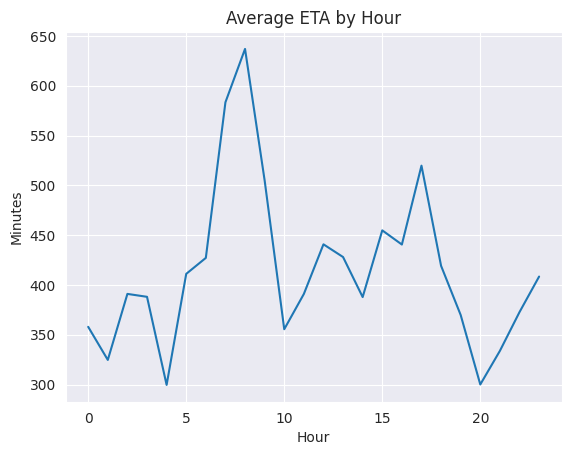

In [78]:
avg_eta.groupby(["cancellation_hour"])["m_order_eta"].mean().plot()

plt.title('Average ETA by Hour')
plt.xlabel('Hour')
plt.ylabel('Minutes')

plt.show()

### Insights:

- In the morning hours average time for arrival is the most significant (up to 650 minutes). This may be expained by harsh traffic jams which make it difficult to ride over the cities
- On the contrary, in the night hours average time for arrival varies from 300m to 400m